# Crime prediction

# Decision tree

In [2]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('datasets\\communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [7]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


In [4]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('datasets/communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)
import pydotplus 
from IPython.display import Image 
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

InvocationException: GraphViz's executables not found

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       743
           1       0.90      0.83      0.86      1250

    accuracy                           0.84      1993
   macro avg       0.82      0.84      0.83      1993
weighted avg       0.84      0.84      0.84      1993



In [ ]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 83.59257400903161
Precesion is 90.02601908065915
Recall is 83.04


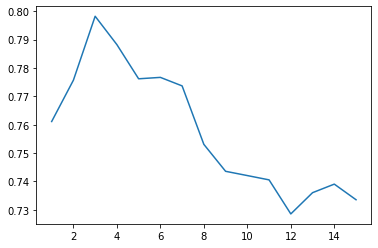

 [0.7611130653266331, 0.7756934673366834, 0.7982437185929648, 0.7882361809045226, 0.776180904522613, 0.7766809045226131, 0.7736783919597989, 0.7530552763819096, 0.7435552763819094, 0.7420502512562814, 0.7405326633165829, 0.7285251256281408, 0.7360150753768845, 0.739032663316583, 0.7335276381909547]


In [ ]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()

print('',y)

According to the plot above, we can get the best number of max_depth feeding in DecisionTreeClassifier. With the increasing number of max_depth, the mean of cross_val_score_accuracy keeps growing up and then starts to decline on number 3.
Therefore, max_depth =3 in DecisionTreeClassifier can get the best performance to analyze the dataset.
We pick at most four biggest information gain in feature_importances array, which is used gini method to calculate and then get four features shown below.

In [ ]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [34 44  3  5]
4_max_normalized_feature is  [0.02267591 0.3620976  0.08881686 0.04512009]
34
feature_name[index] is  PctEmplManu
44
feature_name[index] is  PctKids2Par
3
feature_name[index] is  racePctWhite
5
feature_name[index] is  racePctHisp


Because cross-validation requires that we train on a reduced size dataset and then test on data we did not train against the average accuracy, precision and recall scores drop compared with the full dataset train and test.

# NaiveBayes-Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
# print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])





from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

mislabel num is  442
ind is  [38 44 45 41 15 46 50  3 43 40]
10_max_normalized_feature is  [0.61686366 0.80974842 0.66500857 0.67464461 0.66107643 0.64294945
 0.70926105 0.73522995 0.74554481 0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv
cross_val_accuracy is  [0.775      0.8        0.825      0.79899497 0.70351759 0.65326633
 0.81407035 0.73366834 0.71356784 0.79899497]
cross_val_accuracy_avg is  0.761608040201005
cross_val_precision is  [0.86363636 0.92929293 0.95       0.92079208 0.94594595 0.86842105
 0.92307692 1.         0.77868852 0.93814433]
cross_val_precision_avg is  0.9117998148278733
cross_val_recall is  [0.76  0.736 0.7

$\dfrac{|μ_T-μ_F |}{(σ_T+σ_F )}$, the measure of choosing predictive feature, is derived by Correlation coefficient formula, $\dfrac{Cov(X,Y)}{σ_Xσ_Y}$. According to the definition of Correlation coefficient, in order to standardlize the covariance which is really sensetive, we need to divide variance to get the indicator of Correlation coefficient between X and Y. Therefore, $\dfrac{|μ_T-μ_F |}{(σ_T+σ_F )}$,the absolute correlation coefficient , can estimate the strength of the relationship between the attribute and T/F label. If the number is larger, the relationship is stronger. So it can be the criteria to find out predictive feature.

Naive Bayes on average has worse accuracy and recall than Decision Tree on the dataset.  This is likely due to correlations between features in the dataset that by definition the Naive Bayes classifier assumes are conditionally independent. Interestingly, both find PctKids2Par to be the most predictive feature.

# LinearSVC

In [ ]:
from sklearn import svm
lin_svc = svm.LinearSVC(C=0.01447, penalty="l1", dual=False).fit(initial, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
print("",feature_weight)
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i], ' feature_weight is ', feature_weight[i])



from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(lin_svc, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(lin_svc, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(lin_svc, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean())  

 [0.         0.         0.10999196 0.64060394 0.         0.38930389
 0.         0.         0.         0.         0.         0.09440392
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.15908962 0.         0.         0.
 0.         0.         0.         0.         0.26828636 1.35129744
 0.         0.         0.50641045 0.         0.         0.
 0.         0.         0.40976569 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01102575 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.      

In this method of estimating predictive features, we use L1-norm to be a penalty in LinearSVC. L1 is known as least absolute errors to compute the penalty value to be used for adjusting the model. It has a sparsity property that reduces the coeficients for features that are not predictive to zero removing them from the model adjustment calculations. 

The Penalty value, C, represents the degree of model complexity. We tuned C to a low value to pick out at most 11 predictive features. This can be achieved because the L1 model is more likely to reduce coefficients of features to zero when a lower C value is set. racePctWhite, racePctHisp, PctKids2Par, PctIlleg, FemalePctDiv and TotalPctDiv are all consistent features with the previous models. PctPersDenseHous, pctWPubAsst, racepctblack and pctUrban have not been predictive in previous models but they also have low coefficients in the LinearSVC model, so they choices of these features by the model is somewhat arbitrary as they will only contribute slight adjustments to the model to correct for errors.

In comparison with DecisionTree, LinearSVC improves accuracy, precision and recall for this dataset. This could be explained by the fact that LinearSVC is able to find an optimal linear sepparating hyperplane for the dataset, while Decision Tree is only able to use axis alligned planes to splint in a heirarchical fashion to split the dataset. Interestingly LinearSVC has a different most predictive feature than the previous models, TotalPctDiv. PctKids2Par is the second most predictive feature for LinearSVC, so it still maintains high importance. This likely means that TotalPctDiv is more effective as a linear sepparator with non-axis aligned planes.

# Linear Regression

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

lr = linear_model.LinearRegression(normalize=True)
Y = df['ViolentCrimesPerPop']
predicted = cross_val_predict(lr, initial, Y, cv=10)
print('10_fold_cv_MSE is ',mean_squared_error(Y, predicted))
y_pred = lr.fit(initial, Y).predict(initial)

print('MSE on training set is ',mean_squared_error(Y, y_pred))

# print('coef is ',lr.coef_)

min=np.min(lr.coef_)
print('min is ',min)
index_min = np.argmin(lr.coef_)
print(index_min)
max=np.max(lr.coef_)
print('max is ',max)
index_max = np.argmax(lr.coef_)
print(index_max)
print('coefficient[min] is ',feature_name[index_min])

print('coefficient[max] is ',feature_name[index_max])

10_fold_cv_MSE is  0.020102698466732363
MSE on training set is  0.016516774880307176
min is  -0.6756944788028589
67
max is  0.6350881164986205
64
coefficient[min] is  PctPersOwnOccup
coefficient[max] is  PersPerOccupHous


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
# Using RidgeCV to reduce the amount of verfitting
ridge_model = RidgeCV(alphas=[10.0,1.0,0.1, 0.01, 0.001])
print(ridge_model)
ridge_reg_score = cross_val_predict(ridge_model, initial, Y, cv=10)
ridge_fit = ridge_model.fit(initial, Y)
#To get the best alpha
print('Best Alpha: ', ridge_model.alpha_)
ridge_predict = ridge_model.predict(initial)
#accuracy of each Fold
print(ridge_reg_score)
#mean accuracy of 10 Folds
print(ridge_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is: ',mean_squared_error(Y, ridge_reg_score))

#MSE on the Training set
mse_ridge = np.mean((ridge_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_ridge)

RidgeCV(alphas=array([1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03]), cv=None,
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)
Best Alpha:  1.0
[0.15629536 0.29723509 0.52328122 ... 0.09344901 0.16300833 0.16714695]
0.23708242110390326
10_fold_cv_MSE is:  0.019803952528784058
Mean Square Error on training set:  0.01676352915516941


For this problem there is clearly some overfitting on linear regression when compared with ridge regression since the MSE of ridge regression is worse than linear regression but the CV-MSE of ridge regression is better than that of linear regression. The inability for linear regression to drop feature coefficients to zero in the formula clearly has some effect on the method against this dataset.

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pol = PolynomialFeatures(degree = 2)
print(pol)

lin_reg = LinearRegression()
pip = Pipeline([("polynomial Feature", pol),("linear_Regression", lin_reg)])
poly_reg_score = cross_val_predict(pip, initial, Y, cv=10)
p_fit = pip.fit(initial, Y)
p_predict = pip.predict(initial)
#accuracy of each fold
print(poly_reg_score)
#mean accuracy of 10 Folds
print(poly_reg_score.mean())

#MSE 10 Fold CV
print('10_fold_cv_MSE is ',mean_squared_error(Y, poly_reg_score))

#MSE on Training Set
mse_poly = np.mean((p_predict - Y) ** 2)
print ("Mean Square Error on training set: ", mse_poly)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')
[ 0.54688907  0.53206536  0.32258531 ... -0.19221641  0.1728655
  0.40108877]
0.23572162136759564
10_fold_cv_MSE is  0.12995767733400218
Mean Square Error on training set:  4.348046424501931e-29


The linear model significantly outperforms the quadratic model for this dataset. The true model of the dataset is much more likely to be on the order of linear than quadratic.

# Dirty Data

In [ ]:
df=pd.read_csv('communities-crime-full.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']

# print('total len is ',len(Y))
initial=pd.read_csv('communities-crime-full.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('community', 1)
initial = initial.drop('county', 1) 

In [ ]:
initial.replace("?",0,inplace=True)

In [ ]:
feature_name=list(initial)
initial=initial.apply(pd.to_numeric)
New_data=initial.fillna(initial.mean())
# print('before...')
# print(initial)
# print('after...')
# print(New_data)  
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(New_data, Y)
clf
fold=df['fold']

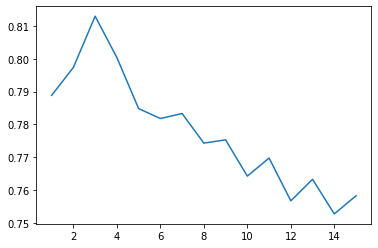

y is  [0.7888608590214756, 0.797373446836171, 0.8129462861571539, 0.8003609590239756, 0.7848157328933223, 0.7817930948273707, 0.7833182204555114, 0.774303120078002, 0.7752955323883098, 0.7642502812570314, 0.7697629940748519, 0.7567202055051376, 0.7632779194479863, 0.7527400310007751, 0.758270206755169]


In [ ]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(New_data, Y)
    y_pred = clf.predict(New_data)
    scores = cross_val_score(clf, New_data, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)
plt.plot(x, y)
plt.show()

In [ ]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [29  5  3 44]
4_max_normalized_feature is  [0.02066687 0.04857088 0.08791053 0.36224029]
29
feature_name[index] is  PctLess9thGrade
5
feature_name[index] is  racePctHisp
3
feature_name[index] is  racePctWhite
44
feature_name[index] is  PctKids2Par


The CV result between clean data and full data with the same parameters results in slightly improved accuracy. This might be explained by missing values being replaced by mean of their respective columns. This reduction of the overall variance of the dataset could be improving performance. The most predictive features remain the same so the dirty features being available to split on cannot be the explanation.

# PCA&K-NN

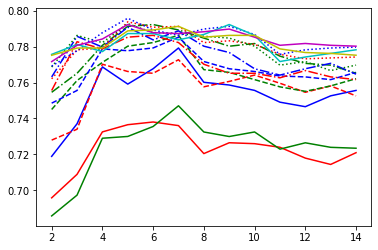

In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('communities-crime-clean.csv')
Y = df['highCrime']
fold=df['fold']
state=df['state']
community=df['communityname']
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)

x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

<ul>
<li>X-axis is number of components</li>
<li>Y-axis is accuracy
<ul>
<li>Red-solid-line is k=1</li>
<li>Green-solid-line is k=2</li>
<li>Blue-solid-line is k=3</li>
<li>Red-dashed-line is k=4</li>
<li>Green-dashed-line is k=5</li>
<li>Blue-dashed-line is k=6</li>
<li>Red-dash-dot-line is k=7</li>
<li>Green-dash-dot-line is k=8</li>
<li>Blue-dash-dot-line is k=9</li>
<li>Red-dotted-line is k=10</li>
<li>Green-dotted-line is k=11</li>
<li>Blue-dotted-line is k=12</li>
<li>Cyan-solid-line is k=13</li>
<li>Magenta-solid-line is k=14</li>
<li>Yellow-solid-line is k=15</li>
</ul></li>
</ul>

Blue dotted line has best performance at n-components=5 meaning k=12

In [ ]:
pca = PCA(n_components=5)
pca.fit(initial)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([0.26753256, 0.1879639 , 0.08245766, 0.07097958, 0.04612133])

In [ ]:
pcdf = pca.transform(initial)

In [ ]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 87.0279146141215
Accuracy is 84.14450577019569
Precision is 89.3760539629005
Recall is 84.8


In [ ]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 79.57286432160804
Cross validation precision is 85.35884460774638
Cross validation recall is 81.60000000000001


K-nn is a grouping method using distance as the most important factor for classification of data. This combined with the loss of specific features in PCA dimensionality reduction makes finding reliable predictive features very difficult.

Thus the best estimator of predictive features is the greatest magnitude features of the eigenvector that captures the largest percentage of variance in the dataset.

In [ ]:
feature_name=list(initial)

ind = np.argpartition(pca.components_[0], -10)[-10:]

print('ind is ',ind)
print('10_max_vector_components is ',pca.components_[0][ind])

for x in range(0, len(ind)):
    index=ind[x]
    print('vector_component[index] is ',feature_name[index])

ind is  [83 84 80 19 45 44 81 82 85 12]
10_max_vector_components is  [0.16356539 0.19320424 0.16436957 0.17966268 0.17867647 0.16873687
 0.16398596 0.16706879 0.16710099 0.1884921 ]
vector_component[index] is  RentMedian
vector_component[index] is  RentHighQ
vector_component[index] is  OwnOccMedVal
vector_component[index] is  medFamInc
vector_component[index] is  PctYoungKids2Par
vector_component[index] is  PctKids2Par
vector_component[index] is  OwnOccHiQuart
vector_component[index] is  RentLowQ
vector_component[index] is  MedRent
vector_component[index] is  medIncome


PCA to K-NN results are similar to Decision Tree.  The most significant features are vastly different from the other methods implemented in this project, this is likely because they aren't derived from a classification algorithm but from the features with greatest variance in a dimensionality reduction algorithm.

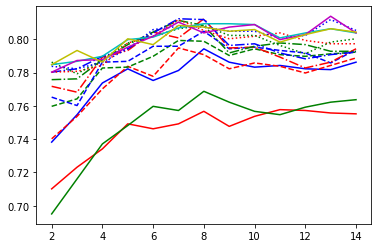

In [ ]:
df=pd.read_csv('communities-crime-full.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']
x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(New_data)
    pcdf = pca.transform(New_data)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

<ul>
<li>X-axis is number of components</li>
<li>Y-axis is accuracy
<ul>
<li>Red-solid-line is k=1</li>
<li>Green-solid-line is k=2</li>
<li>Blue-solid-line is k=3</li>
<li>Red-dashed-line is k=4</li>
<li>Green-dashed-line is k=5</li>
<li>Blue-dashed-line is k=6</li>
<li>Red-dash-dot-line is k=7</li>
<li>Green-dash-dot-line is k=8</li>
<li>Blue-dash-dot-line is k=9</li>
<li>Red-dotted-line is k=10</li>
<li>Green-dotted-line is k=11</li>
<li>Blue-dotted-line is k=12</li>
<li>Cyan-solid-line is k=13</li>
<li>Magenta-solid-line is k=14</li>
<li>Yellow-solid-line is k=15</li>
</ul></li>
</ul>

Magenta and yellow solid lines have best overall performance at n-components=5 meaning k=14 or k=15, favoring least complexity k=14 will be chosen.

In [ ]:
pca = PCA(n_components=5)
pca.fit(New_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([0.2394124 , 0.18353585, 0.10879137, 0.06463075, 0.05124064])

In [ ]:
pcdf = pca.transform(New_data)
pcdf

array([[ 0.10087611,  0.69348616, -1.6487372 ,  0.11326748, -0.69370186],
       [ 0.14603394,  0.13784977, -0.04653262,  0.85594578,  0.55978143],
       [ 0.42585626, -0.73900246,  0.11130576, -0.01579485,  0.1328277 ],
       ...,
       [ 1.02529048,  0.80959673, -1.21150984, -0.78104965, -0.09335205],
       [-0.02374069,  1.45513615, -0.86622498,  0.08614859, -0.20785511],
       [ 0.9967643 ,  2.27353426,  0.41761032, -0.37601408, -1.07227068]])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 86.25861370085124
Accuracy is 82.99899699097291
Precision is 87.5
Recall is 85.05195843325339


In [ ]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 79.5338370959274
Cross validation precision is 84.65453525462505
Cross validation recall is 82.33079365079365


K-nn is a grouping method using distance as the most important factor for classification of data. This combined with the loss of specific features in PCA dimensionality reduction makes finding reliable predictive features very difficult.

Thus the best estimator of predictive features is the greatest magnitude features of the eigenvector that captures the largest percentage of variance in the dataset.

In [ ]:
ind = np.argpartition(pca.components_[0], -10)[-10:]

print('ind is ',ind)
print('10_max_vector_components is ',pca.components_[0][ind])

for x in range(0, len(ind)):
    index=ind[x]
    print('vector_component[index] is ',feature_name[index])

ind is  [98 36 29  2 32 30 50 17 28 77]
10_max_vector_components is  [0.12076721 0.12140592 0.14547837 0.13535998 0.15096374 0.15265064
 0.16382944 0.17238048 0.18692585 0.18740288]
vector_component[index] is  PctUsePubTrans
vector_component[index] is  PctOccupManu
vector_component[index] is  PctLess9thGrade
vector_component[index] is  racepctblack
vector_component[index] is  PctUnemployed
vector_component[index] is  PctNotHSGrad
vector_component[index] is  PctIlleg
vector_component[index] is  pctWPubAsst
vector_component[index] is  PctPopUnderPov
vector_component[index] is  PctHousNoPhone


PCA to K-NN has improved classification with the addition of the features with missing data. This is likely because new features add some variance that is translated into greater distances between the classes in the reduced dimensionality space.

# PolynomialSVC

In [ ]:
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']

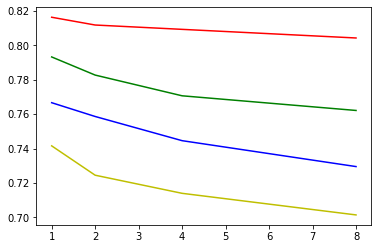

In [ ]:
from sklearn.svm import SVC
x=[]
y=[]
for k in range (1,5):
    y.append([])
for i in range (0,4):
    for j in range (1,5):
        poly_svc = SVC(C=2**i, kernel='poly', degree=j,gamma="scale").fit(initial, Y)
        scores = cross_val_score(poly_svc,initial,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(2**i)    

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'y-')
plt.show()

X-axis is error penalty (C) term
Y-axis is accuracy
Red=Degree 1
Green=Degree 2   
Blue=Degree 3   
Yellow=Degree 4

Degree 2 is picked for best performance against linear model. Error penalty value of 8 is picked for best performance.

In [ ]:
poly_svc = SVC(C=8, kernel='poly', degree=2,gamma='scale').fit(initial, Y)
scores = cross_val_score(poly_svc,initial,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(poly_svc,initial,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(poly_svc,initial,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 76.21356783919597
Cross validation precision is 82.33190451729901
Cross validation recall is 80.55999999999999


There is no reasonable method for evaluation of most predictive features with a Polynomial SVC.

Compared with Linear SVC on this data set a polynomial SVC of degree 2 is able to slightly outperform the linear SVC on classification.

In [ ]:
df=pd.read_csv('communities-crime-full.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
Y = df['highCrime']
fold=df['fold']

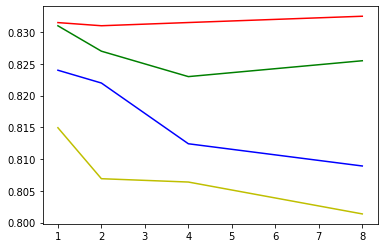

In [ ]:
x=[]
y=[]
for k in range (1,5):
    y.append([])
for i in range (0,4):
    for j in range (1,5):
        poly_svc = SVC(C=2**i, kernel='poly', degree=j,gamma='scale').fit(New_data, Y)
        scores = cross_val_score(poly_svc,New_data,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(2**i)    

plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'y-')
plt.show()

<ul>
<li>X-axis is error penalty (C) term</li>
<li>Y-axis is accuracy<ul>
<li>Red=Degree 1</li>
<li>Green=Degree 2</li>
<li>Blue=Degree 3</li>
<li>Yellow=Degree 4</li>
</ul></li>
</ul>

Degree 2 is picked for best performance against linear model. Error penalty value of 4 is picked for best performance before significantly diminishing returns.

In [ ]:
poly_svc = SVC(C=4, kernel='poly', degree=2, gamma='scale').fit(New_data, Y)
scores = cross_val_score(poly_svc,New_data,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(poly_svc,New_data,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(poly_svc,New_data,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 82.29739993499837
Cross validation precision is 86.14389533299904
Cross validation recall is 85.61142857142856


There is no reasonable method for evaluation of most predictive features with a Polynomial SVC.

The polynomial SVC is fairly resilient to the missing data in the dirty data set losing very little accuracy and precision and gaining recall. However the plotting output indicates that a linear SVC would likely outperform the polynomial SVC on the dirty data.

# New Threshold

average is  0.23798294029101857
Q1(25%) is  0.07
median is  0.15
Q3(75%) is  0.33
average between Q3 and Q1 is  0.2


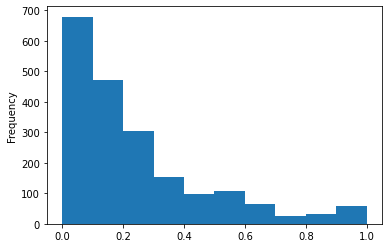

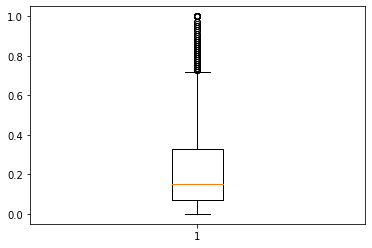

In [ ]:
df=pd.read_csv('communities-crime-clean.csv')
# df.describe()
df['ViolentCrimesPerPop'].plot.hist()
print('average is ',np.average(df['ViolentCrimesPerPop']))
Q1, median, Q3 = np.percentile(df['ViolentCrimesPerPop'], [25, 50, 75])
print("Q1(25%) is ",Q1)
print("median is ",median)
print("Q3(75%) is ",Q3)
print("average between Q3 and Q1 is ",(Q3+Q1)/2)
plt.show()
plt.boxplot(df['ViolentCrimesPerPop'])
plt.show()

According to histogram and boxplot, we can know how "ViolentCrimesPerPop" distributes in the dataset. And there are lots of outliers following in second part of the dataset, so mean(0.2379) is not suitable to be a threshold.
Then, based on quartile deviation method to retrive Q1, median and Q3, median is different with average between Q1 and Q3. Since the problem of outlier is removed from distance from Q1 to Q3, average between Q1 and Q3 is more suitable than median to be a new threshold. Therefore, 0.2, average between Q1 and Q3, is the most useful threshold.

# New Threshold in DecisionTree

In [ ]:
df=pd.read_csv('communities-crime-full.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(New_data, Y)
clf
fold=df['fold']
scores = cross_val_score(clf, New_data, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 

print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(clf,New_data,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf,New_data,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)


cross_val_accuracy is  [0.785      0.81       0.775      0.78       0.795      0.8
 0.79396985 0.84422111 0.86363636 0.79292929]
Cross validation accuracy is 80.39756611339526
Cross validation precision is 76.93896969919835
Cross validation recall is 74.20370370370371


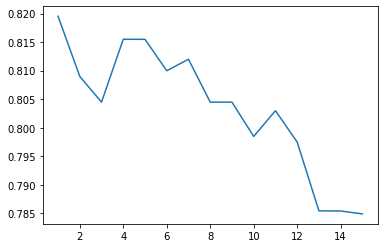

y is  [0.8195286533678493, 0.8089831988223948, 0.8044756611339526, 0.8154957870158874, 0.81548314806355, 0.8099806608801584, 0.8119857367646311, 0.8044781736967668, 0.8044655347444293, 0.79846307294046, 0.8029757372722196, 0.7974731485711385, 0.7854252829805594, 0.7854000304553068, 0.7848848281813107]


In [ ]:
import matplotlib.pyplot as plt
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(New_data, Y)
    y_pred = clf.predict(New_data)
    scores = cross_val_score(clf, New_data, Y,None,'accuracy',cv=10,n_jobs = -1)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()
print('y is ',y)

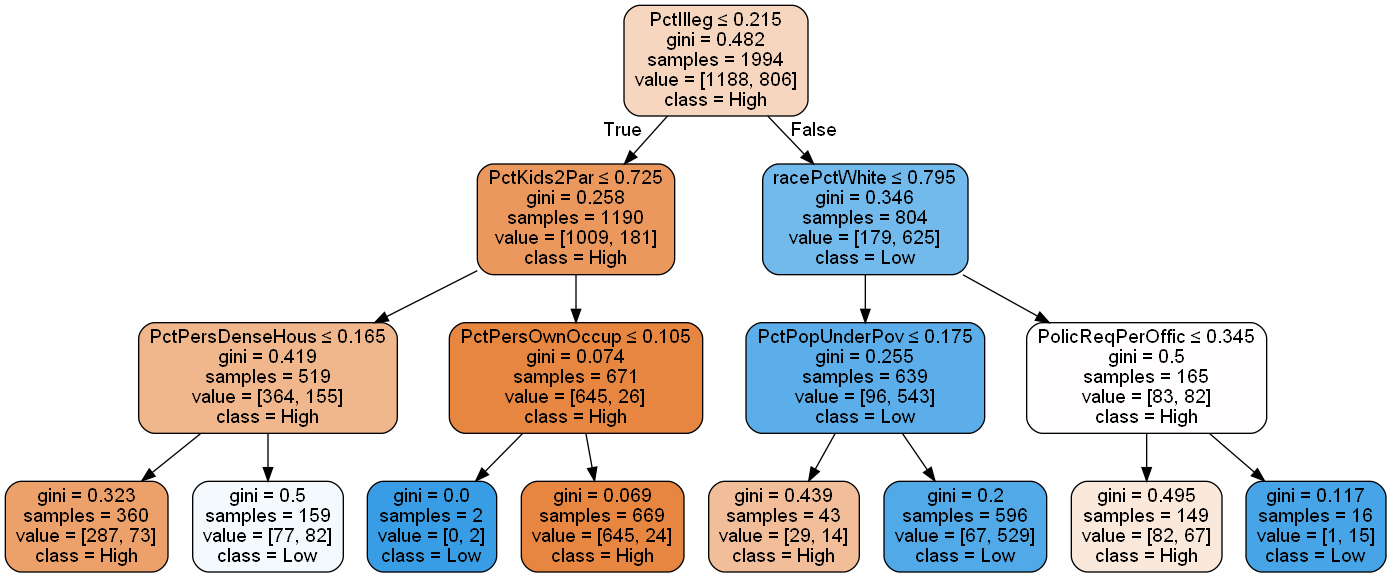

In [ ]:
classname=['High','Low']
clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(New_data, Y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(New_data),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

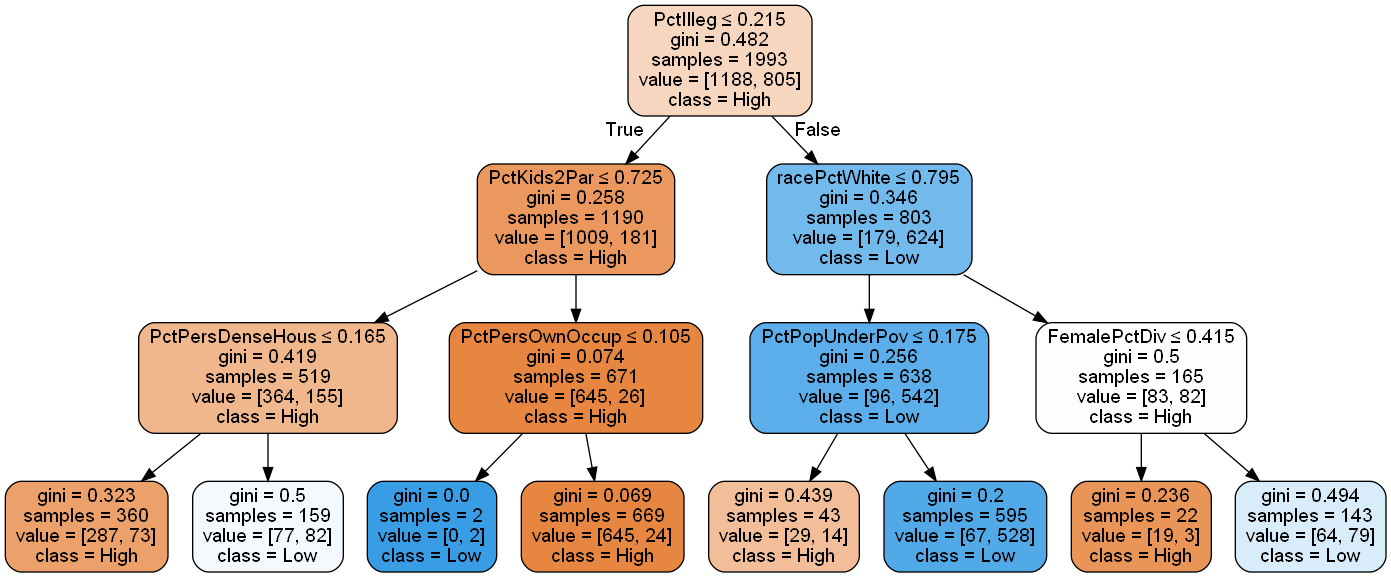

In [ ]:
df=pd.read_csv('communities-crime-clean.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']


clf = tree.DecisionTreeClassifier(max_depth=3)

clf = clf.fit(initial, Y)
clf
import pydotplus 
from IPython.display import Image 
classname=['High','Low']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(initial),  
                         class_names=classname,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [ ]:
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 

print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

# y_pred = clf.predict(initial)
# print ('Accuracy is', accuracy_score(Y,y_pred)*100)
# from sklearn.metrics import precision_score
# print ('Precesion is', precision_score(Y,y_pred)*100)
# from sklearn.metrics import recall_score
# print ('Recall is', recall_score(Y,y_pred)*100)

cross_val_accuracy is  [0.745      0.815      0.78       0.805      0.855      0.72864322
 0.8040201  0.85929648 0.65151515 0.77777778]
Cross validation accuracy is 78.21252728287904
Cross validation precision is 76.78170568162275
Cross validation recall is 70.5493827160494


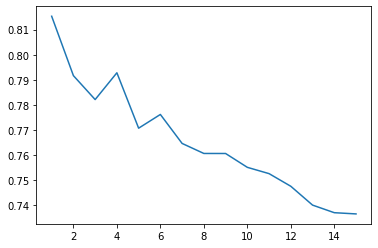

y is  [0.8153219633521142, 0.7916554235825592, 0.7821252728287904, 0.7927968631033958, 0.7707212324247502, 0.7761909547738692, 0.7646431653215573, 0.7606506776305773, 0.7606380386782396, 0.7551229886807777, 0.7526104766255519, 0.7475751992284655, 0.7400751992284655, 0.73705002284148, 0.7365626617938175]


In [ ]:
y=[]
x=[]

for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()
print('y is ',y)

Using the new threshold a single feature PctIlleg becomes highly predictive of the dataset, but the rest of the possible features to split on lose their effectiveness as linear separators. As such the most effective Decision Tree with the new threshold is depth 1. It would seem that Decision Tree on this dataset greatly benefits from taking a more informed approach to deciding a threshold.

# New Threshold in Naive Bayes Gaussian

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    print('feature_name[index] is ',feature_name[index])
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',np.mean(scores)*100) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',np.mean(scores)*100) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',np.mean(scores)*100) 

mislabel num is  352
normalized_feature is  [0.33306076 0.03258098 0.57607554 0.72301674 0.04198184 0.35978937
 0.05081276 0.1491096  0.09012258 0.07690147 0.31722709 0.02102557
 0.50499798 0.32275839 0.10399085 0.68789992 0.12525604 0.63770018
 0.08482528 0.52115517 0.39921489 0.24898057 0.33249932 0.11958945
 0.18131628 0.1593845  0.29721696 0.4271772  0.57247427 0.46873416
 0.53762178 0.35764455 0.53696231 0.35122208 0.02515546 0.10257724
 0.31749042 0.37536845 0.57546639 0.2216214  0.65369163 0.63466832
 0.12098212 0.77237886 0.84288241 0.71696935 0.66301396 0.04048604
 0.17378054 0.41761193 0.78896678 0.26418494 0.1721343  0.22136547
 0.25550443 0.30076635 0.22549075 0.24285105 0.24483414 0.25357801
 0.26564133 0.32422931 0.37334747 0.29009904 0.029548   0.13965855
 0.28580806 0.58538383 0.50490824 0.52004923 0.37863295 0.38278532
 0.32275872 0.49473664 0.41475204 0.00776573 0.07533747 0.54894892
 0.33590694 0.22200447 0.19982129 0.17949289 0.26929275 0.26607002
 0.25915258 0.2719

For Naive Bayes performance improves relative to the negative class, but drops relative to the positive class with the new threshold. The most predictive feature has stayed the same, PctIlleg. This can be explained by the fact that the change in threshold is relatively small, meaning the distribution of the true and false classes was minimally changed.

In [ ]:
df=pd.read_csv('communities-crime-full.csv')
df
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
gnb = GaussianNB()
y_pred = gnb.fit(New_data, Y).predict(New_data)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
print('normalized_feature is ',normalized_feature)


ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    print('feature_name[index] is ',feature_name[index])


fold=df['fold']
scores = cross_val_score(gnb, New_data, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',np.mean(scores)*100) 
scores = cross_val_score(gnb, New_data, Y,fold,'precision',10)
print('cross_val_precision is ',np.mean(scores)*100) 
scores = cross_val_score(gnb, New_data, Y,fold,'recall',10)
print('cross_val_recall is ',np.mean(scores)*100) 

mislabel num is  438
normalized_feature is  [0.33274269 0.03287805 0.57704633 0.72386798 0.04153745 0.35920958
 0.05085409 0.14858366 0.08981515 0.07740031 0.31675301 0.0200312
 0.5055121  0.32354202 0.10375662 0.68832887 0.12581775 0.63850066
 0.08474548 0.52167001 0.39959873 0.24903205 0.33286641 0.12001192
 0.18105687 0.16017197 0.29580373 0.42703688 0.57319478 0.46921976
 0.53793289 0.35770605 0.53779681 0.35200369 0.02540681 0.1021982
 0.31726384 0.37483834 0.57581793 0.22154289 0.65395151 0.63499371
 0.1209443  0.77307217 0.84355664 0.7176549  0.66376979 0.040136
 0.1738027  0.41755548 0.78979398 0.26386201 0.17174017 0.22053971
 0.25428553 0.29914528 0.22489731 0.2422117  0.24418607 0.25292452
 0.26491873 0.32366511 0.37324073 0.28994221 0.02975956 0.14011086
 0.28591501 0.58523484 0.50463683 0.51953768 0.37782316 0.38253558
 0.3232456  0.49444454 0.41492867 0.00694628 0.07560749 0.54940092
 0.3366176  0.2224585  0.20026634 0.1799043  0.27004056 0.26678122
 0.25976563 0.2725392 

Compared with the clean dataset Naive Bayes performs quite badly, this is likely because the replacement of missing data moves the variance and mean of the two classes much closer together.

# New Threshold in LinearSVC

In [ ]:
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
lin_svc = svm.LinearSVC(C=0.014, penalty="l1", dual=False).fit(initial, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i],' feature_weight_is ',feature_weight[i])

from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(lin_svc, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores,' average ',np.mean(scores)*100) 
scores = cross_val_score(lin_svc, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores,' average ',np.mean(scores)*100) 
scores = cross_val_score(lin_svc, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores,' average ',np.mean(scores)*100) 

select_feature_is  racePctWhite  feature_weight_is  0.6148849104398312
select_feature_is  racePctHisp  feature_weight_is  0.1537126140730339
select_feature_is  pctUrban  feature_weight_is  0.003335567999709802
select_feature_is  pctWPubAsst  feature_weight_is  0.1884531076811073
select_feature_is  TotalPctDiv  feature_weight_is  0.6949917196510541
select_feature_is  PctKids2Par  feature_weight_is  0.6028786412684136
select_feature_is  PctIlleg  feature_weight_is  0.9114966905736223
select_feature_is  PctPersDenseHous  feature_weight_is  0.22701374281764192
select_feature_is  PctHousOccup  feature_weight_is  0.09291851104338943
select_feature_is  PctHousNoPhone  feature_weight_is  0.06259850670603499
select_feature_is  LemasPctOfficDrugUn  feature_weight_is  0.15340785697165712
cross_val_accuracy is  [0.785      0.845      0.8        0.815      0.85       0.72864322
 0.84924623 0.84422111 0.77272727 0.84343434]  average  81.33272168925436
cross_val_precision is  [0.7375     0.94642857 0

For LinearSVC the performance drops compared with same model against the previous threshold. This model does not seem to benefit from our approach to determining a relevant threshold. Interestingly it has the same most predictive feature as the DecisionTree with the new threshold.

In [ ]:
df=pd.read_csv('communities-crime-full.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.2, 1, 0)
Y = df['highCrime']
fold=df['fold']
feature_name=list(New_data)
lin_svc = svm.LinearSVC(C=0.014, penalty="l1", dual=False).fit(New_data, Y)
# using L1-norm (sparsity method) to make unless feature weight become 0 , C value increase->more complex model having more weight
feature_weight=abs(lin_svc.coef_[0])
for i in range(0,len(feature_weight)):
    if(feature_weight[i]!=0):
        print('select_feature_is ',feature_name[i],' feature_weight_is ',feature_weight[i])



from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(lin_svc, New_data, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores,' average ',np.mean(scores)*100) 
scores = cross_val_score(lin_svc, New_data, Y,fold,'precision',10)
print('cross_val_precision is ',scores,' average ',np.mean(scores)*100) 
scores = cross_val_score(lin_svc, New_data, Y,fold,'recall',10)
print('cross_val_recall is ',scores,' average ',np.mean(scores)*100) 

select_feature_is  racePctWhite  feature_weight_is  0.6245920346193312
select_feature_is  racePctHisp  feature_weight_is  0.13028740618178103
select_feature_is  pctWPubAsst  feature_weight_is  0.20479000508568368
select_feature_is  TotalPctDiv  feature_weight_is  0.6686466636446976
select_feature_is  PctKids2Par  feature_weight_is  0.5905994494970982
select_feature_is  PctIlleg  feature_weight_is  0.8541944382359088
select_feature_is  PctPersDenseHous  feature_weight_is  0.23122936391643079
select_feature_is  PctHousOccup  feature_weight_is  0.0869479923083519
select_feature_is  PctHousNoPhone  feature_weight_is  0.08829024661830204
select_feature_is  LemasSwFTFieldOps  feature_weight_is  0.20329726778810048
cross_val_accuracy is  [0.82       0.81       0.84       0.805      0.825      0.8
 0.83417085 0.81909548 0.85858586 0.84343434]  average  82.55286533678493
C:\Users\xaidi\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\base.py:928: ConvergenceWarning: Liblinear failed to

Compared with the clean dataset on the new threshold the most predictive features remain constant but the additional dimensions of the features with missing data appears to improve accuracy, precision and recall but is still worse than the original threshold linear SVM on clean data.

# Extra Credit: Decision Forest

Decision Forest using a Random Forest algorithm. Nodes are chosen from a the best split of a random subset of the features and the best of a set of random thresholds for those features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv('communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
fold=df['fold']
Y = df['highCrime']
feature_name=list(initial)
clf = RandomForestClassifier(n_estimators=10,max_features='sqrt')
clf = clf.fit(initial, Y)
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=list(initial),  
#                          class_names='highCrime',  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

In [ ]:
y_pred = clf.predict(initial)
feature_importance=clf.feature_importances_
print("feature importance is ",feature_importance)
print ("length feature array",len(feature_importance))
for i in range (0,len(feature_importance)):
    if(feature_importance[i]!=0):
        print("index is ",feature_name[i])

index_max = np.argmax(feature_importance)
print(index_max)

print('coefficient[max] is ',feature_name[index_max])

feature importance is  [0.00617376 0.00520983 0.04445448 0.06588224 0.00509167 0.01798487
 0.00694285 0.00392458 0.00661865 0.00601521 0.00948132 0.00322996
 0.01683528 0.00546681 0.00351437 0.00984912 0.00509462 0.01768049
 0.00542595 0.00660072 0.00248934 0.00357877 0.0028507  0.00448263
 0.00518093 0.0067933  0.00917915 0.03148978 0.00795121 0.00846934
 0.0073547  0.00413827 0.00829769 0.00886101 0.00405676 0.00690836
 0.01297466 0.00336427 0.00724816 0.00865563 0.04338935 0.05137791
 0.00417396 0.04206806 0.08945052 0.01193114 0.00797671 0.00845977
 0.00777303 0.00967094 0.00877892 0.00926904 0.00490172 0.00442834
 0.00415747 0.00781439 0.00246258 0.00286074 0.00320012 0.0057245
 0.00588168 0.00584826 0.01390443 0.00983807 0.00954447 0.00444688
 0.01206824 0.00586396 0.02839695 0.00457158 0.00050936 0.01123192
 0.00943021 0.00393155 0.00480278 0.00592866 0.00752099 0.00449843
 0.00698329 0.00526906 0.00656431 0.00429012 0.00665975 0.00449605
 0.00288723 0.00640844 0.00894202 0.0065

In [ ]:
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precesion is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 99.52
Accuracy is 99.39789262418465
Precesion is 99.52
Recall is 99.52


In [ ]:
scores = cross_val_score(clf,initial,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(clf,initial,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 79.02010050251256
Cross validation precision is 85.48853487134143
Cross validation recall is 81.2


Performance is relatively consistent with that of the standard Decision Tree. The most predictive feature is the same as Decision Tree, PctKids2Par. Random Decision Forest does not seem to offer much for the increase in complexity of the model.